Lesson 22-1
--

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
from sklearn.datasets import load_iris

# Загрузить набор данных
iris = load_iris()
X, y = iris.data, iris.target

# Преобразование в DataFrame для более удобного манипулирования
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y

In [3]:
# Разделим данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Инициализируем модель логистической регрессии
model = LogisticRegression(max_iter=200)

# Обучаем модель на обучающих данных
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [5]:
# Делаем предсказания на тестовом наборе
y_pred = model.predict(X_test)

In [6]:
# Вычислить точность
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0


Матрица ошибок:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


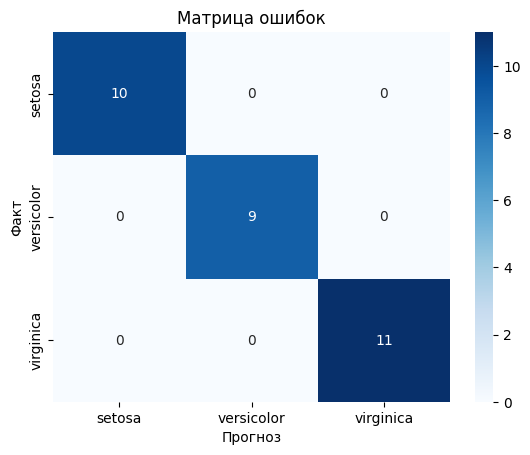

In [7]:
# Отображение матрицы ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print('Матрица ошибок:')
print(conf_matrix)

# Визуализация матрицы ошибок
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Прогноз')
plt.ylabel('Факт')
plt.title('Матрица ошибок')
plt.show()

Кривая Precision-Recall
--

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.datasets import load_breast_cancer

In [9]:
# Загрузить набор данных
data = load_breast_cancer()
X, y = data.data, data.target

# Преобразуем в DataFrame для более удобного манипулирования
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y



In [10]:
# Разделите данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Инициализируем классификатор дерева решений с максимальной глубиной 3
model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Обучите модель на обучающих данных
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [12]:
# Делаем предсказания на тестовом наборе
y_pred = model.predict(X_test)
y_scores = model.predict_proba(X_test)[:, 1]

# Рассчитайте precision и recall 
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f'Precision: {precision}')
print(f'Recall: {recall}')

# Вывести отчет о классификации
print('Отчет о классификации:')
print(classification_report(y_test, y_pred))



Precision: 0.9452054794520548
Recall: 0.971830985915493
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        43
           1       0.95      0.97      0.96        71

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



Матрица ошибок:
[[39  4]
 [ 2 69]]


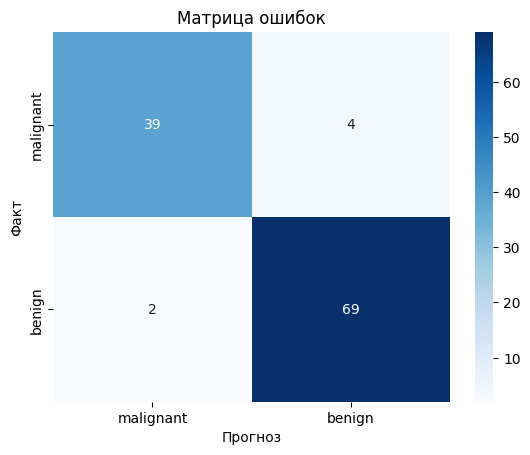

In [13]:
# Вывести матрицу ошибок
conf_matrix = confusion_matrix(y_test, y_pred)
print('Матрица ошибок:')
print(conf_matrix)

# Визуализация матрицы ошибок
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Прогноз')
plt.ylabel('Факт')
plt.title('Матрица ошибок')
plt.show()

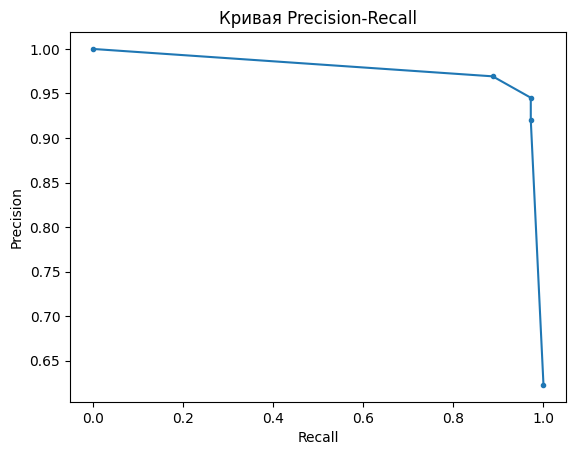

In [14]:
# Рассчитайте кривую Precision-Recall
precisions, recalls, thresholds = precision_recall_curve(y_test, y_scores)

# Построить график кривой Precision-Recall
plt.plot(recalls, precisions, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Кривая Precision-Recall')
plt.show()



Lesson 22-2
--
Over- and under- fitting
--

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import fetch_california_housing



In [16]:
# Загрузите набор данных
data = fetch_california_housing()
X, y = data.data, data.target

# Разделите данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [17]:
def plot_learning_curves(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5):
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring='neg_mean_squared_error'
    )
    
    train_scores_mean = -train_scores.mean(axis=1)
    validation_scores_mean = -validation_scores.mean(axis=1)
    
    plt.figure(figsize=(12, 6))
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training error')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='g', label='Validation error')
    plt.xlabel('Размер обучающих данных')
    plt.ylabel('Ошибка')
    plt.title('Кривые обучения')
    plt.legend(loc='best')
    plt.grid()
    plt.show()



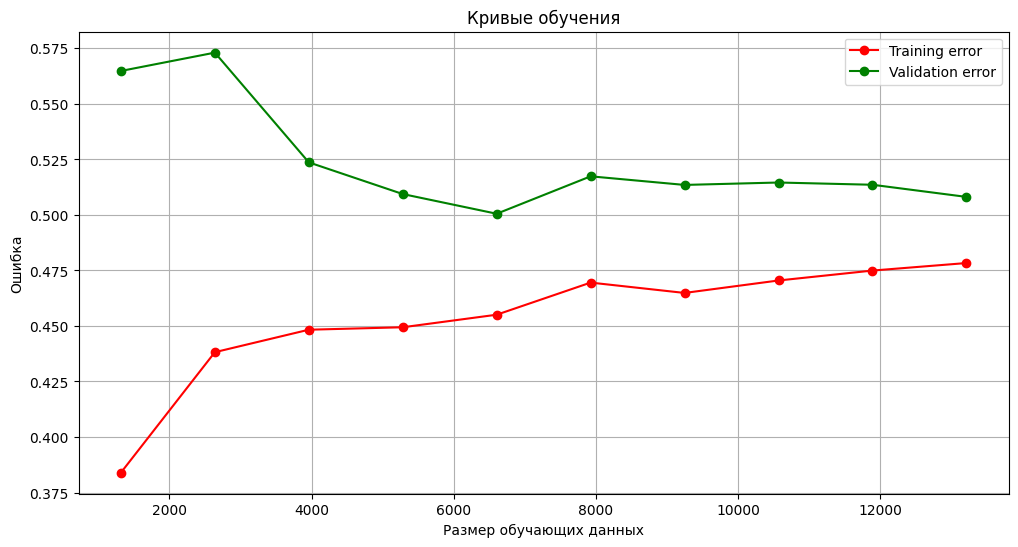

In [18]:
# Инициализируем модель дерева решений
model = DecisionTreeRegressor(max_depth=5, random_state=42)

# Построить кривые обучения
plot_learning_curves(model, X_train, y_train)

Кросс-валидация
-

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score



In [20]:
# Загрузить набор данных
data = load_breast_cancer()
X, y = data.data, data.target

# Преобразуем в DataFrame для более удобного манипулирования
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y



In [21]:
# Инициализируем модель дерева решений
model = DecisionTreeClassifier(random_state=42)

# Выполняем 5-кратную перекрестную валидацию
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Выведите оценки кросс-валидации
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Средняя оценка кросс-валидации: {cv_scores.mean()}')

Cross-Validation Scores: [0.9122807  0.90350877 0.92982456 0.95614035 0.88495575]
Средняя оценка кросс-валидации: 0.9173420276354604


In [22]:
# Разделите данные на обучающий и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучите модель на обучающих данных
model.fit(X_train, y_train)

# Делаем предсказания на обучающем и тестовом наборах
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Рассчитайте точность на обучающем и тестовом наборах
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f'Training Accuracy: {train_accuracy}')
print(f'Testing Accuracy: {test_accuracy}')



Training Accuracy: 1.0
Testing Accuracy: 0.9473684210526315


L1-L2 регуля